# Machine Learning Prediction 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Because of Decision Tree classification error
import warnings
warnings.filterwarnings('ignore')

In [2]:
def plot_confusion_matrix(y, y_predict):
    "this function plots the confusion matrix"
    

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    
    #annot=True to annotate cells
    sns.heatmap(cm, annot=True, ax=ax) 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix')
    ax.xaxis.set_ticklabels(['did not land', 'land']) 
    ax.yaxis.set_ticklabels(['did not land', 'landed']) 

In [3]:
file_path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
X = pd.read_csv(file_path)
X.head()

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


In [4]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(file_path)
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


## Task 1: 
* Create a *NumPy* array from the column `Class` in `data`, by applying the method `to_numpy()` and assign it  to the variable `Y`. 

In [5]:
Y = data['Class'].to_numpy()
Y

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

## Task 2: 
* Standardize the data in `X` and reassign it to the variable `X` using the transform provided below.

In [6]:
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X.astype(float))

## Task 3: 
* Use the function `train_test_split` to split the data X and Y into training and test data. Set the parameter `test_size` to 0.2 and `random_state` to 2. 

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [8]:
Y_test.shape
len(Y_test)

18

## Task 4: 
* Create a logistic regression object, and using that object, create a `GridSearchCV` object
`logreg_cv` with cv = 10.  
* Fit the object to find the best parameters from the dictionary `parameters`.

In [9]:
# Parameters used for grid search
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'], 
             'solver':['lbfgs']}

# Logistic Regression model 
lr = LogisticRegression()

# Create grid search object
logreg_cv = GridSearchCV(lr, parameters, cv=4)

# Find best parameters
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

In [10]:
print("Logistic Regression Best Parameters: ", logreg_cv.best_params_)
print("Logistic Regression Accuracy: ", logreg_cv.best_score_)

Logistic Regression Best Parameters:  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
Logistic Regression Accuracy:  0.8472222222222222


## Task 5:
* Calculate the accuracy on the test data using the method `score`. 
* Plot the confusion matrix.

In [11]:
bestLR = logreg_cv.best_estimator_
bestLR.score(X_test, Y_test)

0.8333333333333334

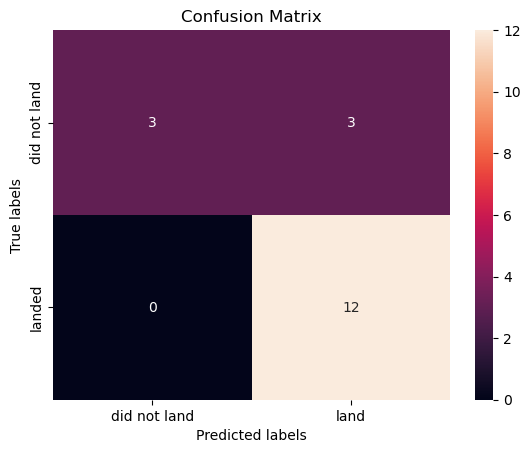

In [12]:
yhat = logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

# Task 6: 
* Create a support vector machine object then  create a `GridSearchCV` object `svm_cv` with cv = 10.
* Fit the object to find the best parameters from the dictionary `parameters`.

In [13]:
# Parameters for grid search 
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}

# Create SVM model
svm = SVC()

# Create grid search object
svm_cv = GridSearchCV(svm, parameters, cv=10)

# Find best parameters
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [14]:
print("SVM Best Parameters: ", svm_cv.best_params_)
print("SVM Accuracy: ", svm_cv.best_score_)

SVM Best Parameters:  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
SVM Accuracy:  0.8482142857142856


## Task 7:
* Calculate the accuracy on the test data using the `score` method. 
* Plot the confusion matrix.

In [15]:
bestSVM = svm_cv.best_estimator_
bestSVM.score(X_test, Y_test)

0.8333333333333334

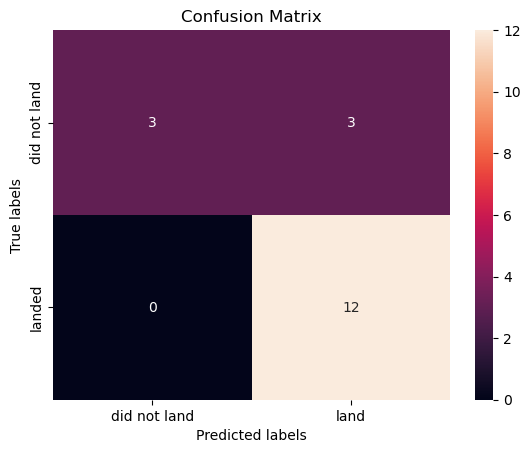

In [16]:
yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## Task 8: 
* Create a decision tree classifier object, and using that object create a `GridSearchCV` object `tree_cv` with cv = 10.  
* Fit the object to find the best parameters from the dictionary `parameters`.

In [17]:
# Parameters for search
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

# Create Decision Tree Model
tree = DecisionTreeClassifier()

# Create grid search object
tree_cv = GridSearchCV(tree, parameters, cv=10)

# Find best parameters
tree_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [18]:
print("Decision Tree Best Parameters: ", tree_cv.best_params_)
print("Decision Tree Accuracy: ", tree_cv.best_score_)

Decision Tree Best Parameters:  {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'}
Decision Tree Accuracy:  0.8642857142857142


## Task 9: 
* Calculate the accuracy of `tree_cv` on the test data using the method `score`. 
* Plot the confusion matrix.

In [19]:
bestTree = tree_cv.best_estimator_
bestTree.score(X_test, Y_test)

0.8888888888888888

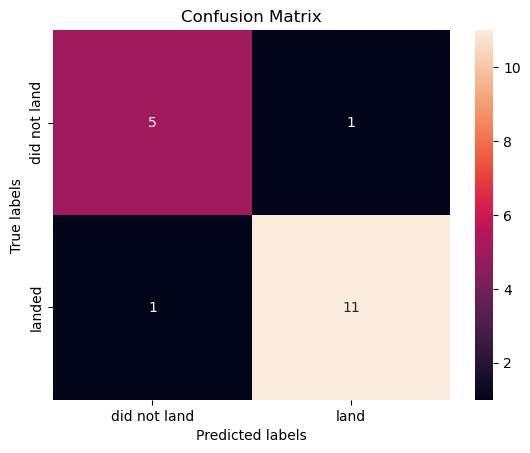

In [20]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## Task 10: 
* Create a k-nearest neighbors object, and using that object create a `GridSearchCV` object `knn_cv` with cv = 10.  
* Fit the object to find the best parameters from the dictionary `parameters`.

In [21]:
# Parameters for grid search 
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

# Create kNN Model
KNN = KNeighborsClassifier()

# Create grid search object
knn_cv = GridSearchCV(KNN, parameters, cv=10)

# Find best parameters
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [22]:
print("k-Nearest Neighbor Best Parameters: ", knn_cv.best_params_)
print("k-Nearest Neighbor Accuracy: ", knn_cv.best_score_)

k-Nearest Neighbor Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
k-Nearest Neighbor Accuracy:  0.8482142857142858


## Task 11:
* Calculate the accuracy of `knn_cv` on the test data using the method `score`. 
* Plot the confusion matrix. 

In [23]:
bestKNN = knn_cv.best_estimator_
bestKNN.score(X_test, Y_test)

0.8333333333333334

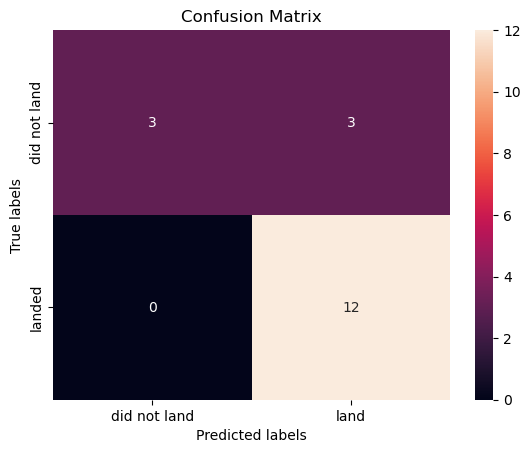

In [24]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)

## Task 12: 
* Find the method(s) that perform best. 

In [25]:
scores = {'Model' : ['Logistic Regression', 'SVM', 'Decision Tree', 'kNN'],
          'Score' : [bestLR.score(X_test, Y_test),
                     bestSVM.score(X_test, Y_test), 
                     bestTree.score(X_test, Y_test), 
                     bestKNN.score(X_test, Y_test)]
         }
scores_df = pd.DataFrame(scores)
scores_df = scores_df.sort_values('Score', ascending=False)
scores_df['Score'] = round(scores_df['Score'], 4)
scores_df.set_index('Model', inplace=True)
scores_df

,Score
Model,
Decision Tree,0.8889
Logistic Regression,0.8333
SVM,0.8333
kNN,0.8333


Although the *k-Nearest Neighbor*, *Support Vector Machine*, and *Logistic Regression* models all scored $83.3%$, the *Decision Tree* model had the highest accuracy score of $88.9%$.   

In [26]:
scores_df = scores_df.reset_index()
scores_df

,Model,Score
0,Decision Tree,0.8889
1,Logistic Regression,0.8333
2,SVM,0.8333
3,kNN,0.8333


Text(0, 0.5, 'Accuracy Score')

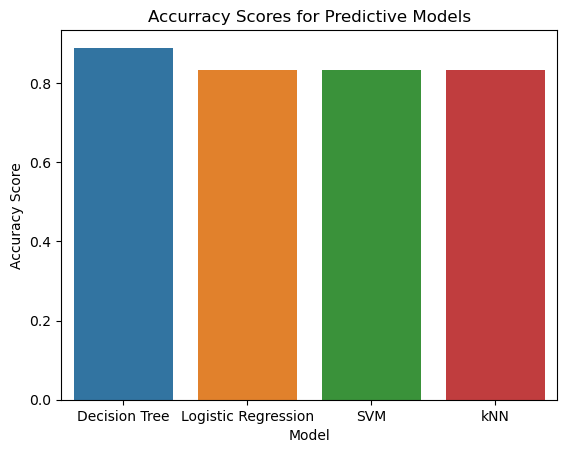

In [27]:
sns.barplot(data=scores_df, 
            x='Model', 
            y='Score')
plt.title('Accurracy Scores for Predictive Models')
plt.xlabel('Model')
plt.ylabel('Accuracy Score')